In [1]:
import numpy as np
from matplotlib import pyplot as plt

In this tutorial we put in practice what you saw in lecture 10 ; namely, how to handle errors in least-square regression. In the first part we consider experimental data obtained in a TP. In the second part we elaborate on the remarks raised in section 10.3 of the lecture notes, when the number of parameters to fit is large.

## Part 1 : errors in least-square regression

### Experiment

We work on data obtained in the TP « Banc mécanique » that was gracefully shared with us. We consider a glider on a air-cushion bench. We measure its speed $v$ and we want to evaluate the laminar friction $f=-\beta v$ it undergoes. We perform least square regression on $f$ and $v$ to compute $\beta$.

We set $l$ the length of the glider ; $m$ its mass ; $L$ the distance between the two points of measurement.

In the following cell the experimental measurements can be loaded. There are two setups ; you can choose one of the two files.

In [2]:
m = 0.142
L = 0.79

donnees = np.loadtxt("ex_11_données.csv", delimiter=',')
l = 0.091

donnees = np.loadtxt("ex_11_donnéesBis.csv", delimiter=',')
l = 0.09

The experiment is repeated $n$ times ($n$ is about twenty) with various initial speeds. In the $\mu$th repetition the measurements consist in four time intervals $t_{\mu,1}$, $t_{\mu,2}$, $t_{\mu,3}$ and $t_{\mu,4}$. They correspond to the times to go through the optical gates on the banch. In the following cell we unpack these. Print a few of them.

In [3]:
t1, t2, t3, t4 = donnees[:,0], donnees[:,1], donnees[:,2], donnees[:,3]
t1

array([0.482, 0.52 , 0.397, 0.618, 0.267, 0.391, 0.436, 0.392, 0.272,
       0.329, 0.17 , 0.258, 0.338, 0.201, 0.176, 0.219, 0.187, 0.2  ,
       0.118])

For each $\mu$ the speeds at these points are $v_{\mu,a}=l/t_{\mu,a}$ (that is, the length of the glider $l$ divided by the duration). We define an average speed $\bar v_\mu=(v_{\mu,1}+v_{\mu,2}+v_{\mu,3}+v_{\mu,4})/4$. The average force is $\bar f_\mu=\frac{m}{L}(v_{\mu,1}^2-v_{\mu,2}^2+v_{\mu,3}^2-v_{\mu,4}^2)/4$. Between $t_{\mu,2}$ and $t_{\mu,3}$ the glider bounces against the end of the bench and the loss of energy has to be taken in account, which explain the previous formula.

Compute $\bar v_\mu$ and $\bar f_\mu$ ; plot the points $(\bar v_\mu, \bar f_\mu)$ as dots.

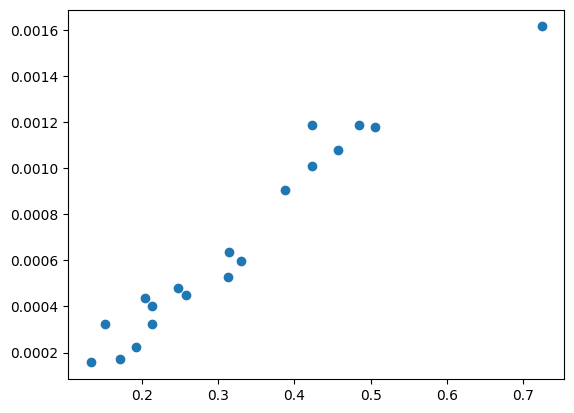

In [4]:
### solution
v1, v2, v3, v4 = l/t1, l/t2, l/t3, l/t4
vM = (v1+v2+v3+v4)/4
fM = m/L*(v1**2-v2**2+v3**2-v4**2)/4

plt.scatter(vM, fM)

### Least squares

Perform the linear regression $\bar f=\beta\bar v+c$ on the scalars $\beta$ and $c$. Use least squares for arbitrary dimension : you should first create a matrix $X$ by stacking a column of 1s with the column of $\bar v$ (check your resulting matrix is correct) ; the fit is then $\bar f=Xw$ with
$$X=\pmatrix{1 & \bar v_1 \\ \vdots & \vdots \\ 1 & \bar v_n} \quad\mathrm{and}\quad w=\pmatrix{c \\ \beta}\ .$$
We write $\hat w=(\hat c, \hat\beta)^T$ the computed estimator.

In [ ]:
X = ...


In [5]:
### solution
n = len(vM)
X = np.stack([np.ones(n), vM]).T
XXinv = np.linalg.inv(X.T@X)
wC = XXinv@(X.T@fM)

Plot the predicted $\hat f=X\hat w=\hat\beta\bar v+\hat c$ vs $\bar v$ (as a continuous line) as well as the experimental datapoints (as dots).

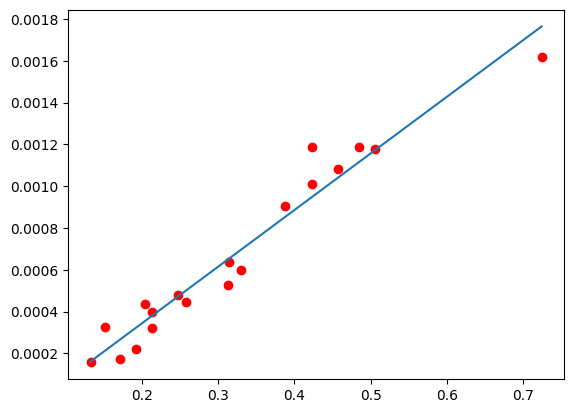

In [6]:
### solution
v = np.linspace(min(vM), max(vM), 15)
plt.plot(v, v*wC[1]+wC[0])
plt.scatter(vM, fM, color='red')

Compute the error on the estimated $\hat\beta$ with the formula of the course
$$\hat\Delta^2=\frac{1}{n}\sum_\mu^n(\bar f_\mu-\hat f_\mu)^2$$
$$\mathrm{Var}(\hat w_i)=\hat\Delta^2[(X^TX)^{-1}]_{ii}$$
Print the resulting estimation with a nice formating and correct numbers of significative digits, such that $\beta=\mathtt{x.xx±0.0x}$.

In [7]:
### solution
deltaFmC = np.mean((fM-X@wC)**2)**0.5
print("𝛽 = {:.2}±{:.1}".format(wC[1], deltaFmC*XXinv[1,1]**0.5))

𝛽 = 0.0027±0.0001


### Error bars and weigthed least squares

We have errors $\Delta_l$, $\Delta_m$, $\Delta_L$ and $\Delta_t$ on the measurements $l$, $m$, $L$ and $t_a$. They have been estimated to the following values.

In [8]:
delta_l = 0.001
delta_m = 0.001
delta_L = 0.001
delta_t = 0.001

We want an estimate of the error on each datapoint. Propagate the errors on $\bar v$ and $\bar f$ with the most generic formula to show that
$$\Delta_{\bar f} = \bar f\left(\frac{\Delta_m}{m}+\frac{\Delta_L}{L}\right)+2\bar f\left(\Delta_t\left(\frac{1}{t_1}+\frac{1}{t_2}+\frac{1}{t_3}+\frac{1}{t_4}\right)+4\frac{\Delta_l}{l}\right)\ .$$
Compute $\Delta_{\bar f}$ for each datapoint.

In [9]:
### solution
deltaFm = fM*(delta_m/m+delta_L/L)+2*fM*(delta_t*(1/t1+1/t2+1/t3+1/t4)+4*delta_l/l)

We do not consider the errors on $\bar v$. Perform the linear regression $\bar f=\beta\bar v+c$ with weigthed least squares as seen in the course (part 10.2 in the lecture notes). You can use `np.diag` to construct the diagonal matrix $\Omega$ (eq. 10.26 year 2024) from the different $\Delta_{\bar f}$.

In [ ]:
X = ...
O = ...


In [10]:
### solution
X = np.stack([np.ones(n), vM]).T
O = np.diag(deltaFm**-2)
XOXinv = np.linalg.inv(X.T@O@X)
wC = XOXinv@(X.T@O@fM)

Plot the regression. For the datapoints add errorbars on the dots with `plt.errorbar(..., ls=' ', yerr=...)`.

<ErrorbarContainer object of 3 artists>

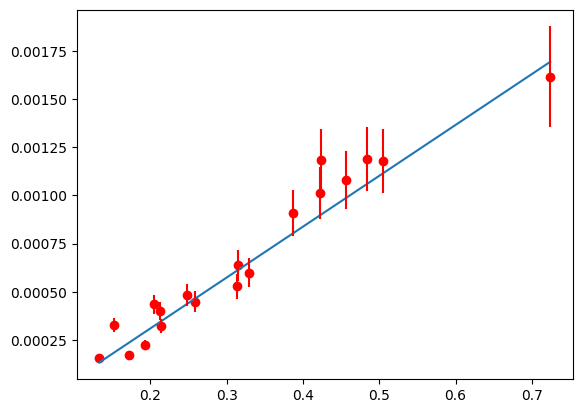

In [11]:
### solution
v = np.linspace(min(vM), max(vM), 15)
plt.plot(v, v*wC[1]+wC[0])
plt.scatter(vM, fM, color='red')
plt.errorbar(vM, fM, yerr=deltaFm, ls=' ', color='red')

Compute the error on the estimated $\hat\beta$ with the formula of the course
$$\mathrm{Var}(\hat w_i)=[(X^T\Omega X)^{-1}]_{ii}\ .$$
Print the resulting estimation.

In [12]:
### solution
print("𝛽 = {:.2}±{:.1}".format(wC[1], XOXinv[1,1]**0.5))

𝛽 = 0.0026±0.0001


We can check that our result is consistent. Compute
$$\mathcal L(\hat w)=\frac{1}{n}\sum_\mu^n\frac{1}{\Delta_{\bar f, \mu}^2}(\bar f_\mu-\hat f_\mu)^2$$
and check that $\mathcal L(\hat w)\approx 1$.

In [13]:
### solution
np.mean((fM-X@wC)**2*deltaFm**-2)

2.6392647121823125

Redo the previous step dividing or multiplying the estimated errors $\Delta_l$, $\Delta_m$, $\Delta_L$ and $\Delta_t$ by a factor five. What do you observe on $\mathcal L(\hat w)$ ?

0.10557058848729257


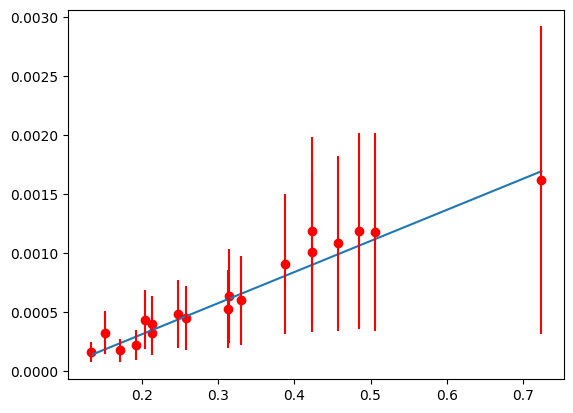

In [14]:
### solution
delta_l = 0.005
delta_m = 0.005
delta_L = 0.005
delta_t = 0.005

deltaFm = fM*(delta_m/m+delta_L/L)+2*fM*(delta_t*(1/t1+1/t2+1/t3+1/t4)+4*delta_l/l)

X = np.stack([np.ones(n), vM]).T
O = np.diag(deltaFm**-2)
XOXinv = np.linalg.inv(X.T@O@X)
wC = XOXinv@(X.T@O@fM)

v = np.linspace(min(vM), max(vM), 15)
plt.plot(v, v*wC[1]+wC[0])
plt.scatter(vM, fM, color='red')
plt.errorbar(vM, fM, yerr=deltaFm, ls=' ', color='red')

print(np.mean((fM-X@wC)**2*deltaFm**-2))

## Part 2 : toward high dimension

We want to study how these estimators behave when the dimension i.e. the number of parameters is growing. In this part we use an artificial dataset to be able to compare our estimations to a ground truth while varying $D$ and $N$. We will see that, even if we know exactly how data was generated, when the dimension $D$ is larger the number $N$ of datapoints must be much larger for the estimators to be correct.

### Setting
Data : we have a train set $X\in\mathbb R^{N\times D}$ and a test set $X'\in\mathbb R^{N'\times D}$. $N$ is the size of the train set and $N'$ the size of the test set. We take the components $X_{\mu i}, X_{\mu i}'$ of the data drawn according to independent centered Gaussians.

There is a teacher $w^*\in\mathbb R^D$ that outputs labels $y_\mu=X_\mu^Tw^*+\epsilon_\mu$ and $y_\mu'=X_\mu^{'T}w^*+\epsilon'_\mu$, where the $\epsilon_\mu, \epsilon_\mu' \sim\mathcal N(0,\Delta^2)$ are independent and account for noise or experimental errors. We take the compoments of $w^*$ drawn according to independent standard Gaussians. $w^*$ is the ground truth ; it is not observed. We can compare how close to it is our empirical estimator.

We perform linear regression : our estimator of the coefficients is $\hat w=(X^TX)^{-1}X^Ty$. The predicted labels are then $\hat y_\mu=X_\mu^T\hat w$ and $\hat y_\mu'=X_\mu^{'T}\hat w$.

We can study different errors : the train error $E_\mathrm{train} = \frac{1}{N}\sum_\mu^N(y_\mu-\hat y_\mu)^2$ (how well data is adjusted), the test error $E_\mathrm{test} = \frac{1}{N'}\sum_\mu^{N'}(y_\mu'-\hat y_\mu')^2$ (how well unseen data will be fitted), as well as the true error on the coefficients (the mean square error) $\mathrm{MSE} = \frac{1}{D}\sum_i^D(w^*_i-\hat w_i)^2$ (how well the hidden parameters are reconstructed).

We recall that :
- $E_\mathrm{train}$ is an estimator of $E_\mathrm{test}$ ;
- $\hat\Delta^2=\frac{1}{N}\sum_\mu^N(y_\mu-\hat y_\mu)^2=E_\mathrm{train}$ is an estimator of $\Delta^2$ ;
- $\widehat{\mathrm{MSE}}=\hat\Delta^2\frac{1}{D}\sum_i^D(X^TX)^{-1}_{ii}$ is an estimator of $\mathrm{MSE}$.

We want to study how good they are, depending on the number of datapoints $N$ and the dimension $D$ of the problem.

We will always take $N'$ fixed large so the empirical $E_\mathrm{test}$ concentrates to the true test error.

In part 1 we had $\hat w=(c,\beta)^T$, $D=2$ and $N\approx 20$.

In [15]:
Ntest = int(10**4)
Delta = 1.5

### low-dimensional : D=5

In the following cell, for $N$ going from 10 to $N_\mathrm{max}=5000$ :
- generate the data $X$ and the train labels $y_\mu$ according to the teacher model ;
- compute the least square estimator $\hat w$ on $X$ and $y_\mu$ and the predicted train and test labels $\hat y_\mu$ and $\hat y_\mu'$ ;
- compute the train and test errors $E_\mathrm{train}$ and $E_\mathrm{test}$ as well as $\widehat{\mathrm{MSE}}$ and $\mathrm{MSE}$. Store these values in lists.

The $X_{\mu,i}$ and the $X'_{\mu,i}$ are drawn according to a centered normal of variance $1/D$. The $w_i^*$ are drawn according to a standard normal. $w^*$ and $X'$ are fixed at the beginning. $X$ should not vary in the sense that going from $N$ to $N+1$ only one datapoint $x\in\mathbb R^D$ is added to $X$. We study the behaviour of the estimators while increasing the number of datapoints we use to compute them.

(hint : if you prefer, you can generate the $N_\mathrm{max}$ datapoints `Xtot` first and, in the loop, select the right ones with `X = Xtot[:N,:]`. To generate the different $N$ you can use `np.geomspace(..., dtype=int)` ; take a hundred of $N$.)

In [ ]:
D = 5
Nmax = 5000

Xtest = np.random.normal(...
w = np.random.normal(...

In [16]:
### solution
D = 5

Etrains, Etests = [], []
MSEsC, MSEs = [], []

Nmax = 5000
Ns = np.geomspace(10, Nmax, 50, dtype=int)

Xf = np.random.normal(0, 1, (Nmax, D))*D**-0.5
Xtest = np.random.normal(0, 1, (Ntest, D))*D**-0.5

w = np.random.normal(0, 1, D)
yf = Xf@w+np.random.normal(0, 1, Nmax)*Delta
yTest = Xtest@w+np.random.normal(0, 1, Ntest)*Delta

for N in Ns:
    X = Xf[:N,:]
    y = yf[:N]
    
    XXinv = np.linalg.inv(X.T@X)
    wC = XXinv@(X.T@y)
    yC = X@wC
    yTestC = Xtest@wC

    Etrain = np.mean((y-yC)**2)
    Etest = np.mean((yTest-yTestC)**2)
    MSEc = Etrain*np.mean(np.diag(XXinv))
    MSE = np.mean((w-wC)**2)
    
    Etrains.append(Etrain)
    Etests.append(Etest)
    MSEsC.append(MSEc)
    MSEs.append(MSE)

In a figure plot the curves $E_\mathrm{train}$ and $E_\mathrm{test}$ vs $N$. Add the line $E=\Delta^2$.

In another figure plot the curves $\widehat{\mathrm{MSE}}$ and $\mathrm{MSE}$ vs $N$. Add the line $N\to 1/N$.

You should use a logarithm axis for $N$ and the MSEs.

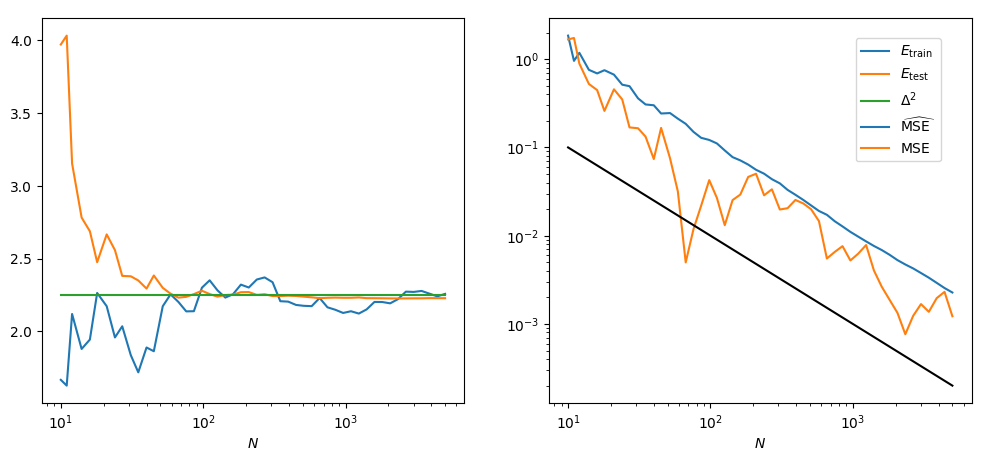

In [17]:
### solution
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

axs[0].plot(Ns, Etrains, label=r"$E_\mathrm{train}$")
axs[0].plot(Ns, Etests, label=r"$E_\mathrm{test}$")
axs[0].plot(Ns, Ns*0+Delta**2, label=r"$\Delta^2$")

axs[1].plot(Ns, MSEsC, label=r"$\widehat{\mathrm{MSE}}$")
axs[1].plot(Ns, MSEs, label=r"$\mathrm{MSE}$")
axs[1].plot(Ns, 1/Ns, color='black')

axs[0].set_xlabel(r"$N$")
axs[1].set_xlabel(r"$N$")
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
fig.legend(loc=(0.85,0.65))

Comment on these graphs (you can re-run your code once or twice) :
- at small $N$, does the train error over-estimates or under-estimates the actual error ? Is $\hat\Delta^2=E_\mathrm{train}$ a consistent estimator ?
- is $\widehat{\mathrm{MSE}}$ a consistent estimator ? What is its convergence rate ?
- what $N$ should we have to reach an error of 1% between $w^*$ and $\hat w$ ?

At small $N$ the train error under-estimates the actual error. In particular at $N<D$ one can always fit all the datapoints and predict no error. $E_\mathrm{train}$ converges to the true value $\Delta$ so it is consistent.

$\widehat{\mathrm{MSE}}$ converges to the true value $\mathrm{MSE}$ so it is consistent. The convergence rate is $1/N$.

To have an error $\mathrm{MSE}=1\%$ one should take $N\approx 10^3$.

### high-dimensional : D=200

Redo the previous questions for $D=200$. Take $N$ going from 250 to 10000 (use only fifty values).

In [ ]:
D = 200
Nmax = 10000

Xtest = np.random.normal(...
w = np.random.normal(...

In [18]:
### solution
D = 200

Etrains, Etests = [], []
MSEsC, MSEs = [], []

Nmax = 10000
Ns = np.geomspace(250, Nmax, 100, dtype=int)

Xf = np.random.normal(0, 1, (Nmax, D))*D**-0.5
Xtest = np.random.normal(0, 1, (Ntest, D))*D**-0.5

w = np.random.normal(0, 1, D)
yf = Xf@w+np.random.normal(0, 1, Nmax)*Delta
yTest = Xtest@w+np.random.normal(0, 1, Ntest)*Delta

for N in Ns:
    X = Xf[:N,:]
    y = yf[:N]
    
    XXinv = np.linalg.inv(X.T@X)
    wC = XXinv@(X.T@y)
    yC = X@wC
    yTestC = Xtest@wC

    Etrain = np.mean((y-yC)**2)
    Etest = np.mean((yTest-yTestC)**2)
    MSEc = Etrain*np.mean(np.diag(XXinv))
    MSE = np.mean((w-wC)**2)
    
    Etrains.append(Etrain)
    Etests.append(Etest)
    MSEsC.append(MSEc)
    MSEs.append(MSE)

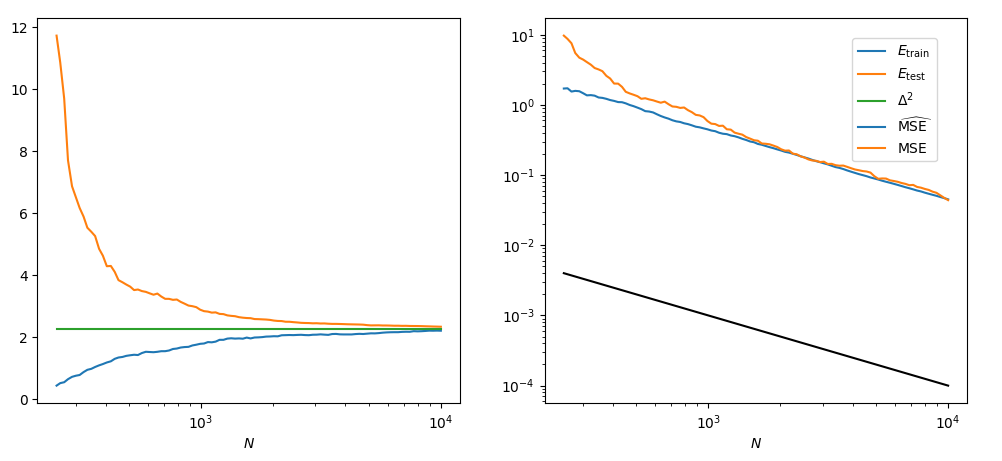

In [19]:
### solution
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

axs[0].plot(Ns, Etrains, label=r"$E_\mathrm{train}$")
axs[0].plot(Ns, Etests, label=r"$E_\mathrm{test}$")
axs[0].plot(Ns, Ns*0+Delta**2, label=r"$\Delta^2$")

axs[1].plot(Ns, MSEsC, label=r"$\widehat{\mathrm{MSE}}$")
axs[1].plot(Ns, MSEs, label=r"$\mathrm{MSE}$")
axs[1].plot(Ns, 1/Ns, color='black')

axs[0].set_xlabel(r"$N$")
axs[1].set_xlabel(r"$N$")
axs[0].set_xscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
fig.legend(loc=(0.85,0.65))

Comments :
- observe the convergence of the estimators ;
- is $N=1000$ still large enough ?

$N\approx 10^3$ is no longer enough to reach a good estimation of $w^*$.

### Scaling limit

For $D$ larger we need $N$ larger for the estimators to be close to the quatities they estimate. We wonder how these two numbers are related, how the limit $N\to\infty$ and $D\to\infty$ should be taken, how large is $N$ with respect to $D$ for the estimators to converge. We suppose there is a scaling relation $N\sim D^\nu$ with $\nu$ an exponent to be determined. This means that if one multiplies $D$ by $\alpha$, one will have to take $N\alpha^\nu$ samples for the estimators to be as good.

Draw the previous curves (you may focus on the MSEs) for two different $D$ (take $D=100$ and $D=\alpha\times100$ with $\alpha=2$) and search how to scale the $N$ with respect to $\alpha$ so the curves collapse (i.e. draw MSE vs $N/\alpha^\nu$). What is the scaling $\nu$ between $N$ and $D$ ?

This is the thermodynamic limit of this model !

In [ ]:
alpha = 2

Nmax = 10000
Ns = np.arange(250, Nmax, 50)

...

plt.plot(Ns, ...
plt.plot(...Ns..., ...

In [20]:
### solution
alpha = 2

Nmax = 10000
Ns = np.geomspace(250, Nmax, 100, dtype=int)

In [21]:
### solution
D = 100

MSEsC, MSEs = [], []

Xf = np.random.normal(0, 1, (Nmax, D))*D**-0.5
Xtest = np.random.normal(0, 1, (Ntest, D))*D**-0.5

w = np.random.normal(0, 1, D)
yf = Xf@w+np.random.normal(0, 1, Nmax)*Delta
yTest = Xtest@w+np.random.normal(0, 1, Ntest)*Delta

for N in Ns:
    X = Xf[:N,:]
    y = yf[:N]
    
    XXinv = np.linalg.inv(X.T@X)
    wC = XXinv@(X.T@y)
    yC = X@wC
    yTestC = Xtest@wC

    Etrain = np.mean((y-yC)**2)
    Etest = np.mean((yTest-yTestC)**2)
    MSEc = Etrain*np.mean(np.diag(XXinv))
    MSE = np.mean((w-wC)**2)
    
    MSEsC.append(MSEc)
    MSEs.append(MSE)

In [22]:
### solution
D = 100*alpha

MSEsCBis, MSEsBis = [], []

Xf = np.random.normal(0, 1, (Nmax, D))*D**-0.5
Xtest = np.random.normal(0, 1, (Ntest, D))*D**-0.5

w = np.random.normal(0, 1, D)
yf = Xf@w+np.random.normal(0, 1, Nmax)*Delta
yTest = Xtest@w+np.random.normal(0, 1, Ntest)*Delta

for N in Ns:
    X = Xf[:N,:]
    y = yf[:N]
    
    XXinv = np.linalg.inv(X.T@X)
    wC = XXinv@(X.T@y)
    yC = X@wC
    yTestC = Xtest@wC

    Etrain = np.mean((y-yC)**2)
    Etest = np.mean((yTest-yTestC)**2)
    MSEc = Etrain*np.mean(np.diag(XXinv))
    MSE = np.mean((w-wC)**2)
    
    MSEsCBis.append(MSEc)
    MSEsBis.append(MSE)

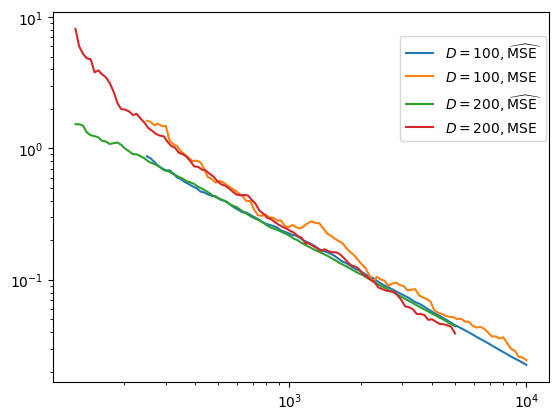

In [23]:
### solution
plt.plot(Ns, MSEsC, label=r"$D=100, \widehat{\mathrm{MSE}}$")
plt.plot(Ns, MSEs, label=r"$D=100, \mathrm{MSE}$")
plt.plot(Ns/alpha, MSEsCBis, label=r"$D=200, \widehat{\mathrm{MSE}}$")
plt.plot(Ns/alpha, MSEsBis, label=r"$D=200, \mathrm{MSE}$")

plt.xscale('log')
plt.yscale('log')
plt.legend(loc=(0.7,0.65))

The scaling is $D\sim N$.